In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data = pd.read_csv("/kaggle/input/meta-kaggle-users-stats/MetaKaggleUserStats.csv")

In [3]:
#check number of rows and columns
data.shape

(22554982, 38)

In [4]:
#print the data
data.head()

,UserId,UserName,RegisterDate,ElapsedDaysSinceRegistration,Country,PerformanceTier,CompetitionsPerformanceTier,DatasetsPerformanceTier,DiscussionsPerformanceTier,NotebooksPerformanceTier,...,RepliesCreated,CompetitionTeamCount,CompetitionCount,CompetitionSubmissionCount,BronzeCompetitionMedals,SilverCompetitionMedals,GoldCompetitionMedals,LastContentShared,LastContentDate,LastContentDaysElapsed
0,1,kaggleteam,2011-03-24,5086,<Unknown>,Kaggle Staff,Contributor,Grand Master,Contributor,Contributor,...,0,0,0,0,0,0,0,Dataset,2019-08-21 23:54:39,2013
1,368,antgoldbloom,2010-01-20,5514,United States,Expert,Contributor,Expert,Expert,Expert,...,499,21,21,59,0,0,0,Dataset,2024-11-01 13:35:36,115
2,381,iguyon,2010-01-29,5505,United States,Expert,Contributor,Contributor,Expert,Contributor,...,205,16,5,16,0,0,0,Topic,2014-09-28 07:19:59,3802
3,383,davidstephan,2010-02-01,5502,Australia,Novice,Novice,Novice,Novice,Novice,...,0,0,0,0,0,0,0,<None>,1970-01-01 00:00:00,-1
4,384,gabewarren,2010-02-02,5501,Australia,Novice,Novice,Novice,Novice,Novice,...,0,0,0,0,0,0,0,<None>,1970-01-01 00:00:00,-1


In [5]:
#check for any null values
data.isnull().sum()

UserId                          0
UserName                        1
RegisterDate                    0
ElapsedDaysSinceRegistration    0
Country                         0
PerformanceTier                 0
CompetitionsPerformanceTier     0
DatasetsPerformanceTier         0
DiscussionsPerformanceTier      0
NotebooksPerformanceTier        0
Following                       0
Followers                       0
DatasetUpvotesGiven             0
DatasetUpvotesReceived          0
NotebookUpvotesGiven            0
NotebookUpvotesReceived         0
ReplyUpvotesGiven               0
ReplyUpvotesReceived            0
TopicUpvotesGiven               0
TopicUpvotesReceived            0
TopicDownvotesReceived          0
ReplyDownvotesReceived          0
ModelUpvotesGiven               0
ModelUpvotesReceived            0
NotebooksCreated                0
DatasetsCreated                 0
ModelsCreated                   0
TopicsCreated                   0
RepliesCreated                  0
CompetitionTea

In [6]:
#in the data, userId, userName columns are unnecessary. Removing them
data = data.drop(columns=['UserId', 'UserName'])

In [7]:
#print data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22554982 entries, 0 to 22554981
Data columns (total 36 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   RegisterDate                  object
 1   ElapsedDaysSinceRegistration  int64 
 2   Country                       object
 3   PerformanceTier               object
 4   CompetitionsPerformanceTier   object
 5   DatasetsPerformanceTier       object
 6   DiscussionsPerformanceTier    object
 7   NotebooksPerformanceTier      object
 8   Following                     int64 
 9   Followers                     int64 
 10  DatasetUpvotesGiven           int64 
 11  DatasetUpvotesReceived        int64 
 12  NotebookUpvotesGiven          int64 
 13  NotebookUpvotesReceived       int64 
 14  ReplyUpvotesGiven             int64 
 15  ReplyUpvotesReceived          int64 
 16  TopicUpvotesGiven             int64 
 17  TopicUpvotesReceived          int64 
 18  TopicDownvotesReceived        int64 
 19

In [8]:
#top countries with high users
country_counts = data['Country'].value_counts()
top_countries = country_counts.head(10)
top_countries

Country
<Unknown>         21237528
United States       388437
India               259197
China                50498
United Kingdom       39161
Brazil               34397
Canada               33357
Russia               31651
Japan                24879
Germany              24740
Name: count, dtype: int64

In [9]:
#we use many rows have "Unknown" value for country. Removing this value
data = data[data['Country'] != '<Unknown>']

In [10]:
#top countries with high users
country_counts = data['Country'].value_counts()
top_countries = country_counts.head(10)
top_countries

Country
United States     388437
India             259197
China              50498
United Kingdom     39161
Brazil             34397
Canada             33357
Russia             31651
Japan              24879
Germany            24740
France             23501
Name: count, dtype: int64

PerformanceTier
Novice          1142914
Contributor      156798
Expert            14639
Master             2507
Grand Master        544
Kaggle Staff         52
Name: count, dtype: int64


<Axes: title={'center': 'Tiers'}, xlabel='PerformanceTier'>

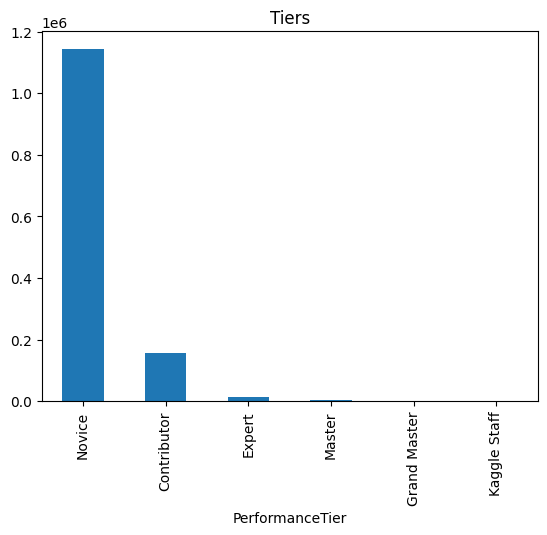

In [11]:
#user count based on performance tiers
tier_counts = data['PerformanceTier'].value_counts()
print(tier_counts)
data['PerformanceTier'].value_counts().plot(kind='bar', title='Tiers')